In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns

In [37]:
def var_viz(sd): 
    x = np.random.normal(0, sd, 1000)
    plt.plot(x, np.zeros(len(x)), 'o', markeredgecolor=(0, 0, 0, 1), color = 'lightblue', alpha = 0.4)
    plt.xlim(-10, 10)
    plt.title(f'The variance of the data is: {np.var(x): .6f}')
    plt.show()

In [38]:
interact(var_viz, sd = widgets.FloatSlider(min = 0, max = 10, step = .1))

interactive(children=(FloatSlider(value=0.0, description='sd', max=10.0), Output()), _dom_classes=('widget-int…

<function __main__.var_viz(sd)>

### Variance and Covariance

$$Var(X) = \frac{1}{n}\sum_{i = 1}^n (x_i - \mu)^2$$

Depending on the context, we may be working with a discrete collection of data points or a continuous function $f$ that can describe a probability distribution of the data.  For example, we used the *normal distribution* to generate the data above.  

Taking an example where we set the mean of the data at zero and the standard deviation to three, we can visualize one such distribution as follows.

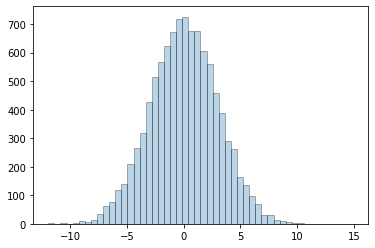

In [43]:
x = np.random.normal(0, 3, 10000)
plt.hist(x, edgecolor = 'black', alpha = 0.3, bins = 50);

It so happens we could describe this shape by a function in two variables -- the mean and standard deviation as follows:

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

In our example above, we have 

$$\sigma = 3 \quad \text{and} \quad \mu = 0$$

In [46]:
def f(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x - mu)/sigma)**2))

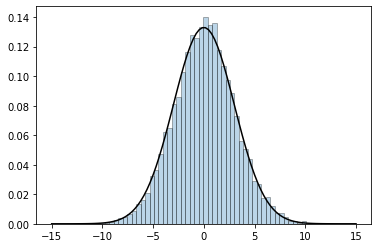

In [54]:
x = np.linspace(-15, 15, 100)
plt.plot(x, f(x, 0, 3), color = 'black')

data = np.random.normal(0, 3, 10000)
plt.hist(data, edgecolor = 'black', alpha = 0.3, bins = 50, density = True);

In [60]:
def normal_plotter(mu, sigma):
    x = np.linspace(-15, 15, 100)
    plt.plot(x, f(x, mu, sigma), color = 'black')

    data = np.random.normal(mu, sigma, 10000)
    plt.hist(data, edgecolor = 'black', alpha = 0.3, bins = 50, density = True)
    plt.xlim(-15, 15)
    plt.title('The Normal Distribution')
    plt.show();

In [62]:
interact(normal_plotter, mu = widgets.FloatSlider(min = -5, max = 5, step = 0.4),
                        sigma = widgets.FloatSlider(min = 1, max = 10, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.4), FloatSlider(value…

<function __main__.normal_plotter(mu, sigma)>

The continuous analogue of our variance formula involves integrating this *probability density function* $f(x)$ as follows:


$$\displaystyle \begin{aligned} \operatorname {Var} (X)=\sigma ^{2}&=\int _{\mathbb {R} }(x-\mu )^{2}f(x)\,dx\\[4pt]&=\int _{\mathbb {R} }x^{2}f(x)\,dx-2\mu \int _{\mathbb {R} }xf(x)\,dx+\int _{\mathbb {R} }\mu ^{2}f(x)\,dx\\[4pt]&=\int _{\mathbb {R} }x^{2}\,dF(x)-2\mu \int _{\mathbb {R} }x\,dF(x)+\mu ^{2}\int _{\mathbb {R} }\,dF(x)\\[4pt]&=\int _{\mathbb {R} }x^{2}\,dF(x)-2\mu \cdot \mu +\mu ^{2}\cdot 1\\[4pt]&=\int _{\mathbb {R} }x^{2}\,dF(x)-\mu ^{2},\end{aligned}$$

where $F$ is the associated *cumulative distribution function*, or more explicitly.

$$\displaystyle \operatorname {Var} (X)=\int _{-\infty }^{+\infty }x^{2}f(x)\,dx-\mu ^{2} $$

### Covariance

Suppose now we have two sets of data $x, y$ that we make to be a linear association with gaussian noise.



In [63]:
x = np.linspace(0, 10, 20)
def f(x): return 3*x + np.random.normal(0, 3, 20)

Text(0.5, 1.0, '$x$ vs. $y$')

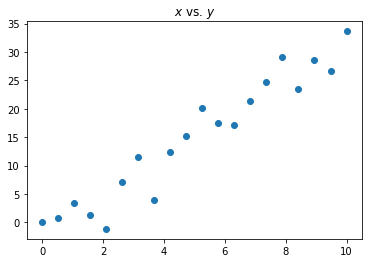

In [65]:
plt.scatter(x, f(x))
plt.title('$x$ vs. $y$')

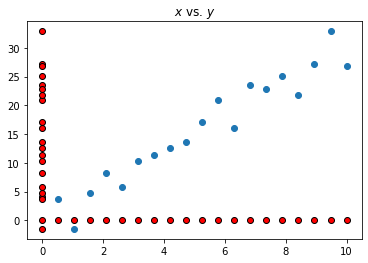

In [102]:
np.random.seed(10)
x = np.linspace(0, 10, 20)
def f(x): return 3*x + np.random.normal(0, 3, 20, )
y = f(x)
plt.scatter(x, y)
plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
plt.title('$x$ vs. $y$');

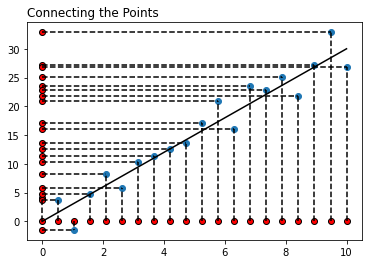

In [114]:
np.random.seed(10)
x = np.linspace(0, 10, 20)
def f(x): return 3*x + np.random.normal(0, 3, 20)
def lbf(x): return 3*x
y = f(x)
plt.scatter(x, y)
plt.plot(x, lbf(x), color = 'black')
plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
plt.title('Connecting the Points', loc = 'left');
for a,b in zip(x, y):
    plt.plot([a, a], [0, b], linestyle = '--', color = 'black')
    plt.plot([0, a], [b, b], linestyle = '--', color = 'black')

In [115]:
def var_experiment(sd):
    np.random.seed(10)
    x = np.linspace(0, 10, 20)
    def f(x): return 3*x + np.random.normal(0, sd, 20)
    def lbf(x): return 3*x
    y = f(x)
    plt.scatter(x, y)
    plt.plot(x, lbf(x), color = 'black')
    plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
    plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
    plt.title('Connecting the Points', loc = 'left');
    for a,b in zip(x, y):
        plt.plot([a, a], [0, b], linestyle = '--', color = 'black')
        plt.plot([0, a], [b, b], linestyle = '--', color = 'black')

In [118]:
interact(var_experiment, 
         sd = widgets.FloatSlider(0, min = 0, max = 5, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='sd', max=5.0), Output()), _dom_classes=('widget-inte…

<function __main__.var_experiment(sd)>

Recall our definition of variance in 1-dimension and now consider our example in 2-dimensions:

$$\displaystyle \operatorname {Var} (X)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}$$

$$\displaystyle \operatorname {cov} (X,Y)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})$$

In [140]:
def covar_experiment(sd):
    np.random.seed(10)
    x = np.linspace(0, 10, 20)
    def f(x): return 3*x + np.random.normal(0, sd, 20)
    def lbf(x): return 3*x
    y = f(x)
    plt.scatter(x, y)
    plt.plot(x, lbf(x), color = 'black')
    plt.scatter(np.zeros(len(x)), y, color = 'red', edgecolors = 'black')
    plt.scatter(x, np.zeros(len(x)), color = 'red', edgecolors = 'black')
    plt.title(f'Covariance of x with y: {np.cov(x, y)[0,1]: .5f}', loc = 'left');
    for a,b in zip(x, y):
        plt.plot([a, a], [0, b], linestyle = '--', color = 'black')
        plt.plot([0, a], [b, b], linestyle = '--', color = 'black')

In [141]:
interact(covar_experiment, 
         sd = widgets.FloatSlider(0, min = 0, max = 5, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='sd', max=5.0), Output()), _dom_classes=('widget-inte…

<function __main__.covar_experiment(sd)>

In [131]:
X = np.stack((x, y), axis = 0)

In [137]:
pd.DataFrame(np.cov(X, ddof = 0), columns = ['x', 'y'], index = ['x', 'y'])

,x,y
x,9.210526,27.180693
y,27.180693,86.472521


In [136]:
x_bar = np.mean(x)
y_bar = np.mean(y)
xs = [xi-x_bar for xi in x]
ys = [yi-y_bar for yi in y]
np.mean([x*y for x,y in zip(xs, ys)])

27.18069311256793

### $r^2$ and Pearson's Correlation Coefficient

$$\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}$$
 
where:

- $\operatorname {cov}$: is the covariance

- $\sigma _{X}$ is the standard deviation of $\displaystyle X$

- $\sigma _{Y}$  is the standard deviation of $\displaystyle Y$.

 

 



**NOTE!!**: Not quite our coefficient determined by deriving the line of best fit but you should note how we are able to get a sense of the variation that is explained by considering Pearson's $r$.

$$\displaystyle y_{i}=\alpha +\beta x_{i}+\varepsilon _{i}$$

The least squares estimates in this case are given by simple formulas

$$\beta = \frac{\text{Cov} [x, y]}{\text{Var} [x]}$$

and 

$$\alpha = \bar{y} - \beta\bar{x}$$

In [164]:
def pearsons_experiment(m, sd):
    np.random.seed(10)
    x = np.linspace(0, 10, 20)
    def f(x): return m*x + np.random.normal(0, sd, 20)
    def lbf(x): return m*x
    y = f(x)
    rects = []
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.scatter(x, y, color = 'black')
    ax.plot(x, lbf(x), color = 'black')
    xbar = np.mean(x)
    ybar = np.mean(y)
    for a,b in zip(x,y):
        rect = Rectangle((a, b), xbar - a, ybar - b)
        rects.append(rect)
    patches = PatchCollection(rects, facecolor = 'red', linewidth = 4, edgecolor = 'black',
                             alpha = 0.1)
    ax.add_collection(patches)
    ax.set_title(f'Pearsons $r^2$: {np.corrcoef(x, y)[0,1]: .5f}')

In [169]:
interact(pearsons_experiment, 
         m = widgets.FloatSlider(0.01, min = -5, max = 5, step = 0.21),
        sd = widgets.FloatSlider(min = 0, max = 15, step = 0.2))

interactive(children=(FloatSlider(value=0.01, description='m', max=5.0, min=-5.0, step=0.21), FloatSlider(valu…

<function __main__.pearsons_experiment(m, sd)>

### Example

The data below represents advertising spending in different markets and the corresponding sales.

In [172]:
ads = pd.read_csv('ads.csv', index_col = 0)

In [173]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


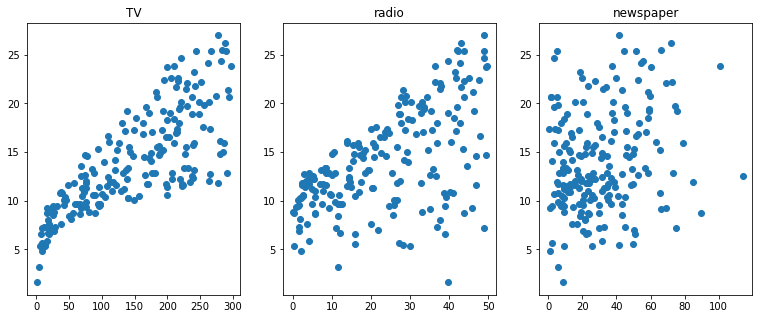

In [180]:
fig, ax = plt.subplots(1, 3, figsize = (13, 5))
x1 = ads['TV']
x2 = ads['radio']
x3 = ads['newspaper']
y = ads['sales']
ax[0].scatter(x1, y)
ax[0].set_title('TV')
ax[1].scatter(x2, y)
ax[1].set_title('radio')
ax[2].scatter(x3, y)
ax[2].set_title('newspaper');

In [181]:
#correlation
pd.DataFrame(ads.corr())

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [183]:
#covariance
pd.DataFrame(ads.cov())

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [184]:
from mpl_toolkits.mplot3d import Axes3D 

In [198]:
def scatter_exp(z, d):
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ads['TV'], ads['radio'], ads['sales'])
    ax.set_xlabel('TV')
    ax.set_ylabel('radio')
    ax.set_zlabel('sales')
    ax.view_init(z, d)
    #ax.set_axis_off()

In [199]:
interact(scatter_exp,
        z = widgets.IntSlider(min = 0, max = 360),
        d = widgets.IntSlider(min = 0, max = 360))

interactive(children=(IntSlider(value=0, description='z', max=360), IntSlider(value=0, description='d', max=36…

<function __main__.scatter_exp(z, d)>

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
X = ads[['TV', 'radio']]
y = ads['sales']
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [203]:
lr.coef_

array([0.04575482, 0.18799423])

In [204]:
lr.intercept_

2.921099912405138

In [206]:
#r2 score
lr.score(X, y)

0.8971942610828956

### Differential Equations

Consider

$$\frac{df}{dx} = x^2$$

Consider

$$\frac{df}{dx} = x^2 \quad \text{and} \quad f(2) = 3$$

In [227]:
def dfdx(x): return x**2
def tan_line(x, x0, y0): return y0 + dfdx(x0)*(x - x0)

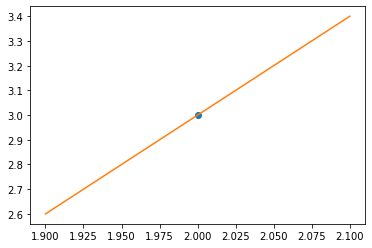

In [231]:
plt.plot(2, 3, 'o')
x = np.linspace(1.9, 2.1, 10)
plt.plot(x, tan_line(x, 2, 3))

In [237]:
x0 = 2
y0 = 3
dx = 0.05
xnext = 2 + dx
ynext = tan_line(xnext, x0, y0) 

In [238]:
xnext

2.05

In [239]:
ynext

3.1999999999999993

(1.9, 2.1)

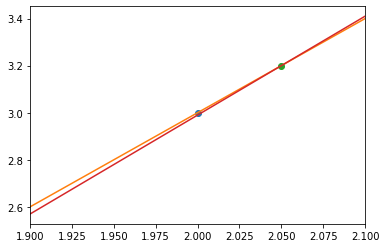

In [247]:
plt.plot(2, 3, 'o')
x = np.linspace(1.9, 2.1, 10)
plt.plot(x, tan_line(x, 2, 3))
plt.plot(2.05, 3.19999, 'o')
plt.plot(x, tan_line(x, 2.05, 3.19999))
plt.xlim(1.9, 2.1)

In [254]:
def dfdx(x): return x**2
x0 = 2
y0 = 3
dx = 0.05
xnext = x0 + dx
ynext = y0 + dfdx(x0)*dx

In [255]:
ynext

3.2

In [256]:
ys = [3]
xs = [2]
for t in range(10):
    ys.append(ys[-1] + dfdx(xs[-1])*dx)
    xs.append(xs[-1] + dx)

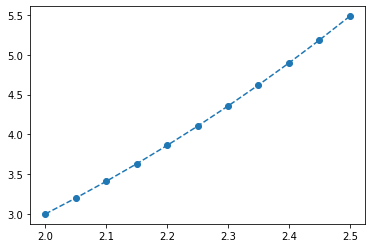

In [257]:
plt.plot(xs, ys, '--o')

### Population Models and Differential Equations

Two examples:

$$\frac{dP}{dt} = c \quad \text{and} \quad \frac{dP}{dt} = kP$$

These describe the change in a population $P$ at some time $t$.

The values of $c$ and $k$ are constants. 

Suppose we have a starting population of 10, and that $c = 3$ and $k = 0.1$.  Determine the missing values in the table below.

In [211]:
pd.DataFrame({'time': [0, 1, 2, 3], 'model_1': ['', '', '', ''],
             'model_2': ['', '', '', '']}).set_index('time')

,model_1,model_2
time,,
0,,
1,,
2,,
3,,


Do these seem like good models for population growth? Why or why not?

### Logistic Model

Imagine instead we have a changing rate of change.  Suppose the plot below models the rate of change of the population as high when there are few inhabitants (10) but low when the number heightens (500).

Text(0.5, 1.0, 'Changing Rate of Change')

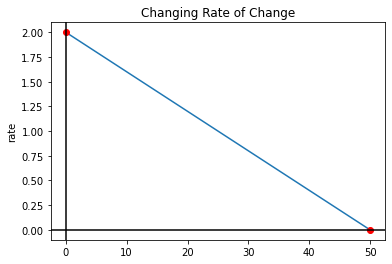

In [261]:
plt.plot([0, 50], [2, 0])
plt.plot([0, 50], [2, 0], 'ro')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.ylabel('rate')
plt.title("Changing Rate of Change")